In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

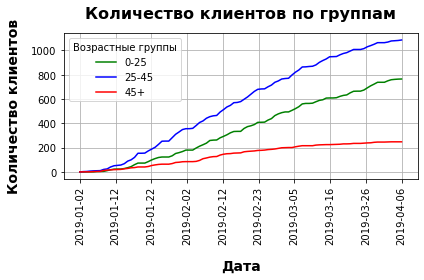

In [2]:
df = pd.read_excel("04fe55a1-a849-4a9b-af39-68051cad4502.xls")

df['age'] = (datetime.now() - df['birth_dt'])

df.drop_duplicates(subset=['client_id'], inplace=True)

ticks = pd.date_range(start='2019-01-02', end='2019-04-06', periods=10)
x = pd.date_range(start='2019-01-02', end='2019-04-06', freq='D')

group1, group2, group3 = [], [], []

for date in x:
    ages = (df[df['reg_dttm'] < date]['age'].dt.days / 365.25).values
    group1.append(ages[ages <= 25].size)
    group2.append(ages[np.where((ages > 25) & (ages <= 45))].size)
    group3.append(ages[ages > 45].size)

plt.plot(x, group1, color='green', label='0-25')
plt.plot(x, group2, color = 'blue', label='25-45')
plt.plot(x, group3, color='red', label='45+')
plt.xticks(ticks, rotation=90)
plt.grid()
plt.legend(title='Возрастные группы')
plt.xlabel('Дата', fontweight='bold', fontsize=14, labelpad=15)
plt.ylabel('Количество клиентов', fontweight='bold', fontsize=14, labelpad=10)
plt.title('Количество клиентов по группам', fontweight='bold', fontsize=16, pad=15)
plt.tight_layout()
plt.savefig('1.png', dpi=100)

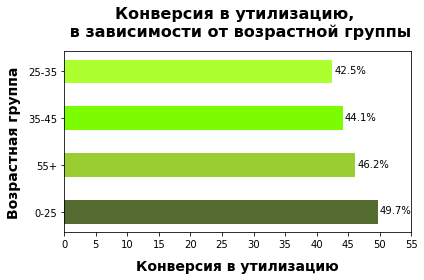

In [3]:
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.annotate('%.1f' % (width) + '%',
                    xy=(width, rect.get_y()),
                    xytext=(18, 8),
                    textcoords="offset points",
                    ha='center', va='bottom')

df = pd.read_excel("04fe55a1-a849-4a9b-af39-68051cad4502.xls")
df['age'] = (datetime.now() - df['birth_dt'])

ages = [(0, 25), (25, 35), (35, 45), (55, np.inf)]
conversion = []
for i, age in enumerate(ages):
    positive = len(df[(df['age'].dt.days / 365.25 >= age[0]) \
                  & (df['age'].dt.days / 365.25 < age[1]) \
                  & (pd.notnull(df['purchase_id']))].drop_duplicates(subset='client_id').index)
    negative = len(df[(df['age'].dt.days / 365.25 >= age[0]) \
                  & (df['age'].dt.days / 365.25 < age[1]) \
                  & (pd.isnull(df['purchase_id']))].index)
    conversion.append([positive / (positive + negative) * 100, i])

conversion.sort(key=lambda x: x[0], reverse=True)
conversion = np.array(conversion)

colors = ['darkolivegreen', 'yellowgreen', 'lawngreen', 'greenyellow']
conv = ['%.1f' % i for i in conversion[:, 0]]
a = plt.barh(['0-25', '55+', '35-45', '25-35'], conversion[:, 0], 0.5, color=colors)
plt.xticks(list(range(0, 56, 5)))
autolabel(a)
plt.xlabel("Конверсия в утилизацию", fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel("Возрастная группа", fontsize=14, fontweight='bold', labelpad=7)
plt.title("Конверсия в утилизацию, \n в зависимости от возрастной группы", fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('2.png', dpi=100)

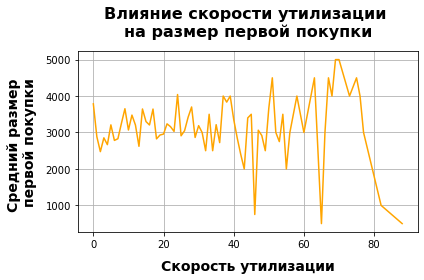

In [4]:
df = pd.read_excel("04fe55a1-a849-4a9b-af39-68051cad4502.xls")
a = df.groupby('client_id')[['purchase_dt', 'reg_dttm']].min()
a = a.dropna()

df = pd.merge(a, df[['client_id', 'purchase_dt', 'purchase_amt']], on=['client_id', 'purchase_dt'])
df['speed'] = (df['purchase_dt'].dt.date - df['reg_dttm'].dt.date).dt.days

a = df.groupby('speed')[['purchase_amt']].mean()

plt.plot(a.index, a['purchase_amt'], color='orange')
plt.grid()
plt.xlabel('Скорость утилизации', fontweight='bold', fontsize=14, labelpad=10)
plt.ylabel('Средний размер \nпервой покупки', fontweight='bold', fontsize=14, labelpad=8)
plt.title('Влияние скорости утилизации \nна размер первой покупки', fontweight='bold', fontsize=16, pad=15)
plt.tight_layout()
plt.savefig('3.png', dpi=100)